In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("CO2 Emissions_Canada.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Text(0, 0.5, 'CO2 Emissions')

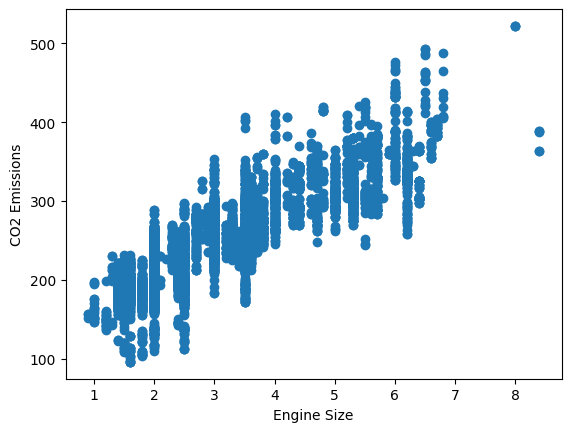

In [9]:
plt.scatter(data["Engine Size(L)"],data["CO2 Emissions(g/km)"])
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")


In [14]:
X=data[["Engine Size(L)"]]
y=data["CO2 Emissions(g/km)"]

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [16]:
X_train.shape

(5169, 1)

In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

In [20]:
from sklearn.linear_model import LinearRegression

regression = LinearRegression(n_jobs=-1)

regression.fit(X_train,y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


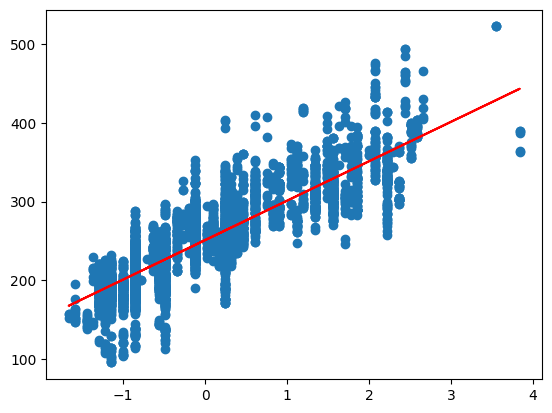

In [23]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="red")

In [30]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

mse= mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

939.4403331445468
23.073809826866395
30.65029091451738


In [24]:
from sklearn.metrics import r2_score
y_pred=regression.predict(X_test)
score=r2_score(y_test,y_pred)
print(score)

0.7218702688223468


In [29]:
size=float(input("Enter the Engine Size : "))
y = regression.predict(scale.transform([[size]]))
print("Predicted CO2 Emission ",y)

Enter the Engine Size :  3.7


Predicted CO2 Emission  [270.57661425]


C:\Users\Athsrv P\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
